# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Гипотезы исследования и исследовательские вопросы

Главной **задачей** данного исследования является определение факторов, которые формируют рыночную стоимость объектов недвижимости.

Поставленная задача формирует несколько основных и побочных **исследовательских вопросов**:   
- Какие факторы формируют полную стоимость объекта недвижимости?  
- В каких населенных пунктах самые дешевые и самые дорогие квадратные метры? 
- Как влияет расстояние от центра Санк-Петербурга на стоимость объекта недвижимости этого города?

В рамках данного исследования поставлены следующие гипотезы:  
- Общая площадь объекта недвижимости прямо влияет его стоимость.  
- Жилая площадь объекта недвижимости прямо влияет его стоимость.  
- Площадь кухни объекта недвижимости влияет его стоимость.  
- Количество комнат объекта недвижимости влияет его стоимость.  
- Тип этажа объекта недвижимости влияет его стоимость.  
- Дата размещения объявления о продаже объекта недвижимости влияет его стоимость.  
- Населенный пункт с самым дорогим квадратным метром является Санкт-Петербург, а с самым дешевым - не город.  
- Расстояние от центра Санкт-Петербурга прямопропорционально измнению стоимости объекта недвижимости (чем дальше от центра - тем дешевле).

Исследование будет проводиться согласно данному плану работ:  
1. Знакомство с данными.  
- первичный анализ куска датасета, чтобы запланировать корректировки, если они обнаружатся.  
- визуализировать те данные, которые находятся в датасете до предобработки данных.  
2. Предобработка данных.  
- работа с пропусками. 
- корректировка типов данных.  
- анализ уникальных значений и работа с аномалиями.  
3. Добавить новые даннные для дальнейшего анализа.  
4. Собственно провести исследовательский анализ данных.  
- визуализировать и изучить данные после эатапа предобработки.  
- провести анализ скорости продажи квартир.  
- проверка гипотез.  
- проверка исследовательских вопросов.  
5. Общий вывод.

Датасет содержит в себе следующие данные:

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до бффлижайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#загрузка библиотеки для дальнейшей работы с таблицами и чтение файла
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [2]:
#первичное знакомство с данными таблицы
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
#более детальное знакомство с данными - изучение типов данных в столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#сначала переименуем столбец cityCenters_nearest согласно правилам хорошего кода
data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest', 
                       'parks_around3000': 'parks_around_3000', 
                       'ponds_around3000': 'ponds_around_3000'}, inplace = True)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around_3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around_3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]]

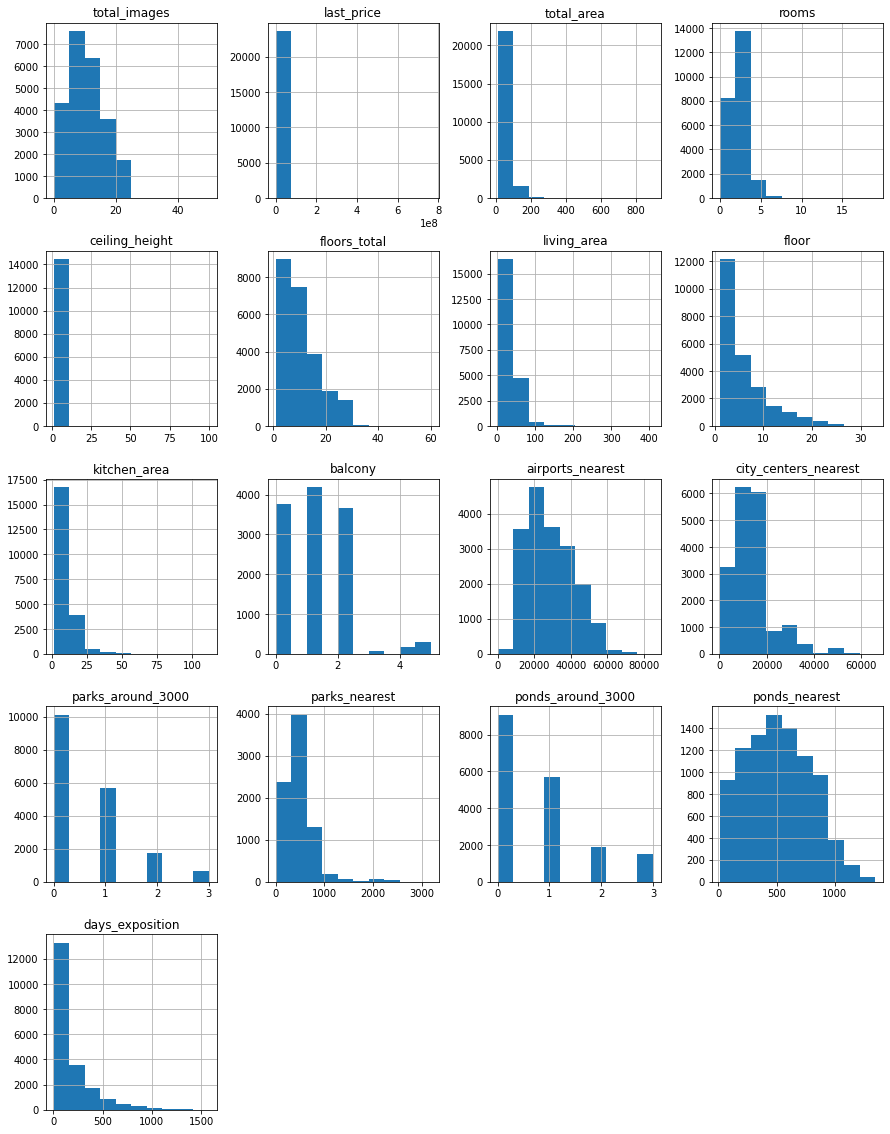

In [5]:
#визуализация данных может помочь увидеть то, что осталось незамеченным на прошлых этапах знакомства с данными
data.hist(figsize=(15, 20))

**Вывод:**  
На этапе предварительного первичного анализа можно сделать несколько выводов:  
- часть данных показывают, что есть некоторая зависимость между количеством парков и прудов и частотой количеством таких значений.  
- присутсвует смещение влево почти у всех данных, что говорит о том, что более низкие значения встречаются чаще - например, первые этажи или низкие потолки. 
- однако, по части данных пока сложно сделать выводы, поскольку выбросы делают гистограммы не информативными (такие как 'last_price', 'ceiling_high'). Следует обратить на них внимание.  

**Проверка на дубликаты**

In [6]:
data.duplicated().sum()

0

Отлично, дубликатов нет

### Предобработка данных

#### Удаление пропусков

In [7]:
#определяем сколько пропусков в каждом столбце
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Обнаружено большое количество пропусков в 12 столбцах из 22. Следует проанализировать их природу. 
Из ячейки info() видно, что всего значений должно быть 23699.  
Как известно, существуют несколько **типов причин появления пропусков**:  
- Missing Completely At Random - появление пропусков абсолютно не объяснимо другими переменными  
- Missing At Random - появление пропусков объяснимо другими переменными с полной информацией  
- Missing Not At Random - пропуск зависит от информации о переменной, а также определяется данными 

Соответственно, если разбить колонки с пропусками по этим 3м группам, то вероятность корректного заполнения вырастет.

##### is_apartment

Начнем с пропусков в столбце "is_apartment". Попробуем рассмотреть представленные закономерности.  
В таблице представлены 2 типа квартир: студии и апартаменты. Второе - промышленное нежилое помещение

In [8]:
data.loc[(data['is_apartment'] == False) & (data['studio'] == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,NaN,5.0,31.0,4,False,...,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
25,3,6800000.0,76.0,2015-10-01T00:00:00,2,2.75,23.0,39.0,18,False,...,15.0,2.0,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,300.0
29,9,8600000.0,100.0,2016-04-09T00:00:00,3,NaN,19.0,52.0,15,False,...,11.0,0.0,Санкт-Петербург,30394.0,11526.0,1.0,532.0,1.0,896.0,125.0
36,13,3790000.0,45.0,2017-01-25T00:00:00,2,NaN,9.0,27.0,9,False,...,6.3,2.0,Санкт-Петербург,49574.0,16461.0,1.0,459.0,0.0,NaN,139.0
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,NaN,14.0,59.0,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000.0,47.0,2016-05-20T00:00:00,1,NaN,6.0,18.2,1,False,...,14.6,0.0,Санкт-Петербург,20503.0,4946.0,2.0,624.0,1.0,519.0,131.0
23667,14,9990000.0,90.0,2017-01-23T00:00:00,3,3.06,17.0,55.0,9,False,...,11.0,2.0,Сестрорецк,56343.0,33272.0,0.0,NaN,1.0,545.0,86.0
23671,3,3450000.0,35.3,2017-04-14T00:00:00,1,2.50,9.0,17.5,4,False,...,7.5,2.0,Санкт-Петербург,21435.0,15261.0,1.0,334.0,1.0,232.0,21.0
23678,10,3500000.0,43.0,2016-05-19T00:00:00,2,2.50,3.0,26.1,2,False,...,4.9,1.0,Пушкин,15823.0,27977.0,0.0,NaN,1.0,1134.0,252.0


In [9]:
data.loc[(data['is_apartment'] == True) & (data['studio'] == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Таким образом, в ходе анализа обнаружено, что существует 3 типа квартир - студии, апартаменты и обычные.  
В таблице нет ни одного признака, который бы указывал на то, что апартаменты являются апартаментами.  
Такая переменная как тип квартиры не фигурирует ни в гипотезах, ни в исследовательских вопросах, значит, пропуски можно игнорировать, так как они относятся к типу "Missing Completely At Random"

##### locality_name

Сразу можно сказать, что эти данные нельзя восстановить по другим переменным, т.е. пропуски относятся к типу "Missing Completely At Random", а поскольку строк с пропущенными данными в этом столбце всего 0,2%, то от их удаления данные не пострадают

In [10]:
data.dropna(subset= ['locality_name'], inplace=True)

Проверим, все ли строчки с пропущенными занчениями в этом столбце удалены.

In [11]:
data['locality_name'].isna().sum()

0

##### ceiling_height

Высота потолков может быть связана с типом населенного пункта, поэтому стоит проверить наличие связи. 

Здесь разумнее отступить от логической структуры предобработки и на данном этапе категоризовать данные в более широкие категории - по городам и другим типам населенных пунктов. 

In [12]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Для данного анализа можно принебречь такими географическими тонкостями как различие между селом, деревней и поселком, разделив населенные пункты на "город" и "не город". 

In [13]:
replacement_dict = {
     r'(\b)посёлок(\b)': r'\1поселок\2',
     r'(\b)посёлок городского типа(\b)':r'\1поселок городского типа\2',
     r'(\b)городской посёлок(\b)':r'\1городской поселок\2', 
     r'(\b)ё(\b)':r'\1е\2'
}
 
data['locality_name'] = data['locality_name'].replace(replacement_dict, regex=True)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Теперь стоит произвести более локальную замену неочевидных дубликатов.

In [14]:
duplicates = ['Кудрово'] # список неправильных имён
name = 'деревня Кудрово' # правильное имя
data['locality_name'] = data['locality_name'].replace(duplicates, name)

In [15]:
duplicates = ['село Павлово'] # список неправильных имён
name = 'посёлок городского типа Павлово' # правильное имя
data['locality_name'] = data['locality_name'].replace(duplicates, name)

In [16]:
duplicates = ['Никольское'] # список неправильных имён
name = 'село Никольское' # правильное имя
data['locality_name'] = data['locality_name'].replace(duplicates, name)

In [17]:
def categorize_town(town):
        if 'деревня' in town:
            return 'не город'
        if 'село' in town:
            return 'не город'
        else:
            return 'город'

In [18]:
data['town_category'] = data['locality_name'].apply(categorize_town)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,город
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,не город
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,город
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,город
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,город


In [19]:
data_3 = data.groupby('town_category')
data_3['ceiling_height'].median()

town_category
город       2.65
не город    2.60
Name: ceiling_height, dtype: float64

Были получены медиальные значения для каждой категории и теперь можно заполнить пропуски.

In [20]:
for a in data['town_category'].unique():
    data.loc[(data['town_category'] == a) & (data['ceiling_height'].isna()), 'ceiling_height'] = data.loc[(data['town_category'] == a), 'ceiling_height'].median()

Проверим, все ли пропуски удалены

In [21]:
data['ceiling_height'].isna().sum()

0

Таким образом, пропуски были заполнены методом Mean Substitution, но в нашем случае это было медиальное значение, так как оно лучше репрезентирует выборку и более устойчиво к выбросам, меньше искажает данные и результаты. 

##### balcony

Сначала следует рассмотреть, какие закономерности могут прослеживаться с другими переменными (проверим тип пропуска "Missing Not At Random")

Сначала стоит проверить, не связан ли пропуск информации о наличии балкона с этажем (а точнее их отсутствие на первом этаже).

In [22]:
data.loc[(data['balcony'].isna()) & (data['floor'] == 1)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category
16,11,6700000.0,82.0,2017-11-23T00:00:00,3,3.05,5.0,55.60,1,NaN,...,NaN,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0,город
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0,не город
70,9,3400000.0,30.0,2018-09-05T00:00:00,1,2.65,5.0,16.00,1,NaN,...,NaN,Санкт-Петербург,39053.0,8313.0,1.0,382.0,0.0,NaN,14.0,город
76,12,2800000.0,55.1,2016-05-14T00:00:00,3,2.60,5.0,38.40,1,NaN,...,NaN,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,606.0,город
84,11,2400000.0,43.9,2019-03-13T00:00:00,2,2.65,2.0,27.46,1,NaN,...,NaN,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23651,7,3350000.0,41.0,2018-12-17T00:00:00,1,2.60,6.0,18.00,1,NaN,...,NaN,поселок городского типа Токсово,NaN,NaN,NaN,NaN,NaN,NaN,NaN,не город
23663,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,...,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0,город
23680,14,5000000.0,59.0,2019-04-04T00:00:00,3,2.50,5.0,52.00,1,NaN,...,NaN,Санкт-Петербург,26835.0,11878.0,0.0,NaN,0.0,NaN,NaN,город
23696,18,2500000.0,56.7,2018-02-11T00:00:00,2,2.60,3.0,29.70,1,NaN,...,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,не город


In [23]:
data.loc[(data['balcony'].isna()) & (data['floor'] != 1)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,город
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,город
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,NaN,...,NaN,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,не город
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.60,27.0,15.43,26,NaN,...,NaN,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,не город
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,NaN,...,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000.0,101.00,2019-04-01T00:00:00,3,3.05,15.0,63.00,12,NaN,...,NaN,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0,город
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,2.65,5.0,31.00,2,NaN,...,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0,город
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.65,5.0,17.50,4,NaN,...,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,город
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.30,3,NaN,...,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,город


На основании полученных данным нельзя однозначно сказать, что отсутсвие информации о наличии балкона связано с первым этажом, где не принято ставить балкон.  
Однако, владелец мог не указать эту информацию в связи с отсутвием балкона (отсутсвие балкона = отсутсвие информации о его наличии).  
Для поставленных гипотез и исследовательских вопросов данные о наличии балконов не важны, но всё равно стоит заполнить пропуски, раз это возможно.

In [24]:
for column in data['balcony']:
    data['balcony'] = data['balcony']. fillna (0.0)
data['balcony'].isna().sum()

0

##### living_area & kitchen_area

Следует рассмотреть, можно ли получить жилую площадь, вычев площадь кухни из общей площади и наоборот, чтобы получить площадь кухни.  

In [25]:
df_new = data[['total_area', 'kitchen_area', 'living_area']]
df_new

,total_area,kitchen_area,living_area
0,108.00,25.00,51.0
1,40.40,11.00,18.6
2,56.00,8.30,34.3
3,159.00,NaN,NaN
4,100.00,41.00,32.0
...,...,...,...
23694,133.81,13.83,73.3
23695,59.00,8.50,38.0
23696,56.70,NaN,29.7
23697,76.75,23.30,NaN


Итак, установить точную жилую площадь и площадь кухни не предоставляется возможным. Не смотря на то, что эти данные нужны для последующего детального анализа, эти данные следует оставить с пропусками, чтобы не исказить результаты.

##### floors_total

Данные пропуски относятся к типу "Missing Completely At Random", их нельзя определить по другим переменным, поэтому чтобы не исказить данные, пропуски следует оставить. 

##### parks_around3000 & parks_nearest

Сначала стоит ознакомиться с данными на предмет связи количества парков и наличия расстояния до них.  

In [26]:
data.loc[(data['parks_around_3000'].isna()) & (data['parks_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,NaN,...,0.0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,не город
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.60,27.0,15.43,26,NaN,...,0.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,не город
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,NaN,...,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,город
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,не город
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,NaN,...,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,NaN,...,0.0,поселок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN,не город
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.65,5.0,17.50,4,NaN,...,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,город
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.00,4,NaN,...,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,город
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.60,3.0,29.70,1,NaN,...,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,не город


In [27]:
data.loc[(data['parks_around_3000'] == 0.0) & (data['parks_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.60,11.0,18.6,1,NaN,...,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,не город
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,2.60,26.0,10.6,6,NaN,...,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,не город
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,город
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,город
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,2.65,5.0,31.0,4,False,...,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.0,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,...,0.0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN,город
23685,15,2490000.0,31.0,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,...,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN,город
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,2.65,9.0,20.0,6,NaN,...,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0,город
23688,19,9200000.0,101.0,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,NaN,...,0.0,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0,город


In [28]:
data.loc[(data['parks_around_3000'].notnull())& (data['parks_around_3000'] != 0.0) & (data['parks_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category


Таким образом, точно можно сказать, что пропуски в переменной о расстоянии связаны с отсутствием парка. Значит, пропуски относятся к типу "Missing At Random".  
Будет логично заменить их пропущенные значения в столбце 'parks_nearest' 0 методом Mean Substitution.

In [29]:
for column in data['parks_nearest']:
    data['parks_nearest'] = data['parks_nearest']. fillna (0.0)
data['parks_nearest'].isna().sum()

0

Пропуски в столбце 'parks_around_3000' можно объяснить возможным отсутсвие парка рядом (поэтому пользователь не заполнил данные).  
Значит, пропуски относятся к типу "Missing At Random".
Будет логично заменить их пропущенные значения в столбце 'parks_nearest' 0 методом Mean Substitution.

In [30]:
for column in data['parks_around_3000']:
    data['parks_around_3000'] = data['parks_around_3000']. fillna (0.0)
data['parks_around_3000'].isna().sum()

0

##### pounds_around_3000 & pounds_nearest

Сначала стоит ознакомиться с данными на предмет связи количества парков и наличия расстояния до них.

In [31]:
data.loc[(data['ponds_around_3000'].isna()) & (data['ponds_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,NaN,...,0.0,городской поселок Янино-1,NaN,NaN,0.0,0.0,NaN,NaN,55.0,не город
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.60,27.0,15.43,26,NaN,...,0.0,поселок Мурино,NaN,NaN,0.0,0.0,NaN,NaN,189.0,не город
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,NaN,...,0.0,Сертолово,NaN,NaN,0.0,0.0,NaN,NaN,90.0,город
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,2.0,деревня Кудрово,NaN,NaN,0.0,0.0,NaN,NaN,60.0,не город
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,NaN,...,0.0,Коммунар,NaN,NaN,0.0,0.0,NaN,NaN,63.0,город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,NaN,...,0.0,поселок Дзержинского,NaN,NaN,0.0,0.0,NaN,NaN,NaN,не город
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.65,5.0,17.50,4,NaN,...,0.0,Тихвин,NaN,NaN,0.0,0.0,NaN,NaN,413.0,город
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.00,4,NaN,...,0.0,Тосно,NaN,NaN,0.0,0.0,NaN,NaN,45.0,город
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.60,3.0,29.70,1,NaN,...,0.0,село Рождествено,NaN,NaN,0.0,0.0,NaN,NaN,NaN,не город


In [32]:
data.loc[(data['ponds_around_3000'] == 0.0) & (data['ponds_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.60,11.0,18.6,1,NaN,...,2.0,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,NaN,81.0,не город
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,2.60,26.0,10.6,6,NaN,...,1.0,поселок Парголово,52996.0,19143.0,0.0,0.0,0.0,NaN,155.0,не город
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,NaN,NaN,город
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,NaN,289.0,город
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,2.65,5.0,31.0,4,False,...,1.0,Ломоносов,48252.0,51677.0,0.0,0.0,0.0,NaN,7.0,город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.0,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,...,0.0,Санкт-Петербург,11827.0,11459.0,0.0,0.0,0.0,NaN,NaN,город
23685,15,2490000.0,31.0,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,...,1.0,Ломоносов,48393.0,51818.0,0.0,0.0,0.0,NaN,NaN,город
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,2.65,9.0,20.0,6,NaN,...,2.0,Санкт-Петербург,40837.0,16704.0,0.0,0.0,0.0,NaN,38.0,город
23688,19,9200000.0,101.0,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,NaN,...,0.0,Санкт-Петербург,15632.0,14428.0,0.0,0.0,0.0,NaN,23.0,город


In [33]:
data.loc[(data['ponds_around_3000'].notnull())& (data['ponds_around_3000'] != 0.0) & (data['ponds_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category


Таким образом, точно можно сказать, что пропуски в переменной о расстоянии связаны с отсутствием пруда. Значит, пропуски относятся к типу "Missing At Random".  
Будет логично заменить их пропущенные значения в столбце 'ponds_nearest' 0 методом Mean Substitution.

In [34]:
for column in data['ponds_nearest']:
    data['ponds_nearest'] = data['ponds_nearest']. fillna (0.0)
data['ponds_nearest'].isna().sum()

0

Пропуски в столбце 'ponds_around3000' можно объяснить возможным отсутсвие пруда рядом (поэтому пользователь не заполнил данные).
Значит, пропуски относятся к типу "Missing At Random". Будет логично заменить их пропущенные значения в столбце 'ponds_nearest' 0 методом Mean Substitution.

In [35]:
for column in data['ponds_around_3000']:
    data['ponds_around_3000'] = data['ponds_around_3000']. fillna (0.0)
data['ponds_around_3000'].isna().sum()

0

##### airports_nearest & city_centers_nearest

Эти данные невозможно восстановить с помощью других и не несут смысла, поэтому их следует отнести к типу "Missing Completely At Random" и игнорировать пропуски, поскольку удаление данных и искусственное заполнение сильно исказит данные.


#### Изменение типа данных

Для анализа типа данных следует вспоминить их тип.

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В столбцах "last_price", "floors_total", "airports_nearest", "city_centers_nearest", "parks_around3000", "parks_nearest", "ponds_around3000", "ponds_nearest", "days_exposition" типы данных "float64". Эти данные имеют целые значения, поэтому тип данных можно изменить на целочисленные, от этого данные не исказятся. Однако, среди этих данных есть те, в которых есть пропущенные занчения.  
Столбец "is_apartment" можно было бы изменить на bool, но там есть пропущенные значения, которые создают тип данных "float".  
Данные в столбце "first_day_exposition" следует изменить в "date_time".

Следует проверить, в каких из float столбцов, которые можно изменить на int есть пропущенные значения.

In [37]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around_3000           0
parks_nearest               0
ponds_around_3000           0
ponds_nearest               0
days_exposition          3180
town_category               0
dtype: int64

Значит, изменить данных можно только у "last_price", "parks_around3000", "parks_nearest", "ponds_around3000", "ponds_nearest".

In [38]:
data['last_price'] = data['last_price'].astype('int')

In [39]:
data['floors_total'] = pd.to_numeric(data['floors_total'], errors='coerce')

In [40]:
data['parks_around_3000'] = data['parks_around_3000'].astype('int')

In [41]:
data['parks_nearest'] = data['parks_nearest'].astype('int')

In [42]:
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int')

In [43]:
data['ponds_nearest'] = data['ponds_nearest'].astype('int')

In [44]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S'
)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

#### Поиск аномалий

Сначала стоит рассмотреть данные подробнее на предмет выбросов.

##### last_price

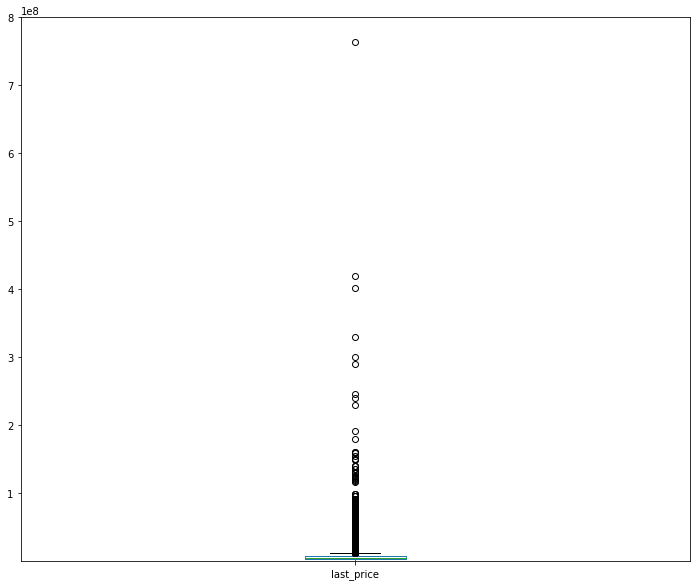

In [46]:
import matplotlib.pyplot as plt
data['last_price'].plot(kind='box', figsize=(12, 10))
plt.ylim (1, 800000000)
plt.show()

In [47]:
data['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [48]:
data['last_price'].max()

763000000

In [49]:
import numpy as np
q3, q1 = np.percentile (data['last_price'], [75 ,25])
iqr = q3 - q1
q3

6799000.0

In [50]:
data['last_price'].min()

12190

Здесь видно, что максимум сильно отличается от 3го квартиля, а значит, что выбросы следует удалить (те, что выше 20 млн и меньше 100 тыс). Результаты слует сохранить в отдельный датасет, чтобы потом сравнить его с первоначальным и выбрать один из них для дальнейшего анализа.

In [51]:
data.loc[(data['last_price'] < 100000)]['last_price'].count()

1

In [52]:
data.loc[(data['last_price'] > 20000000)]['last_price'].count()

706

In [53]:
data_1 = data.loc[(data['last_price'] < 20000000)]
#data_1 = data[200000000 > data['last_price']]

In [54]:
data_1.shape

(22928, 23)

<AxesSubplot:>

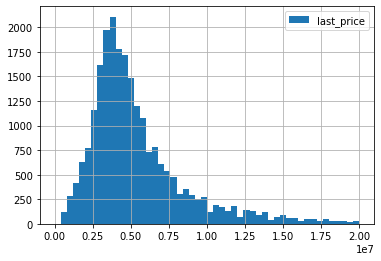

In [55]:
data_1['last_price'].hist(bins=50, legend = 'цена за объект')

<AxesSubplot:>

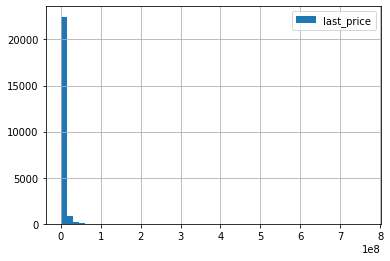

In [56]:
data['last_price'].hist(bins=50, legend = 'цена за объект')

**Вывод:**
Сравнив распределение после обработки данных от выбросов, можно заметить, что выбросов, которые искажали данные стало гораздо меньше, и на этом этапе я могу продположить, что корректировка центральной для проверки гипотез переменная сделает результат более репрезентативным.

##### total_area

In [57]:
data_1['total_area'].describe()

count    22928.000000
mean        56.653378
std         24.593872
min         12.000000
25%         40.000000
50%         51.000000
75%         67.000000
max        320.000000
Name: total_area, dtype: float64

Я бы снова захотела проверить количество выбросов, но далее следует действовать более осторожно, так как "слишком нормализовать данные" тоже не стоит.

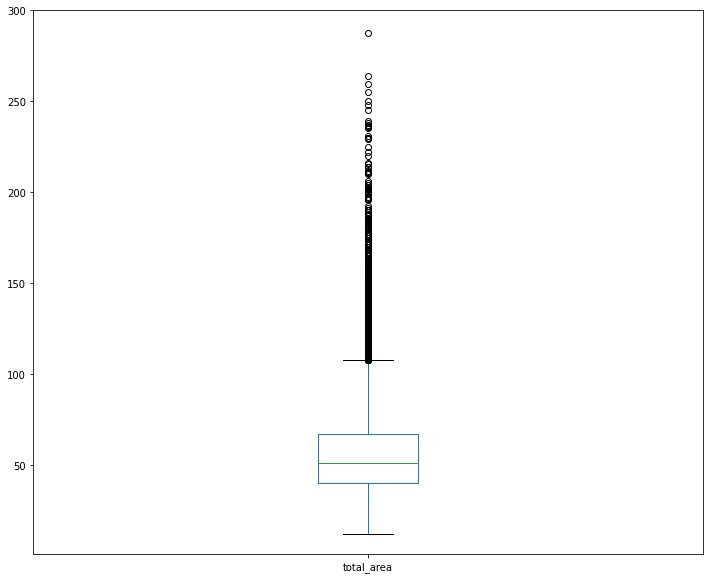

In [58]:
data_1['total_area'].plot(kind='box', figsize=(12, 10))
plt.ylim (1, 300)
plt.show()

In [59]:
q3, q1 = np.percentile (data_1['total_area'], [75 ,25])
iqr = q3 - q1
iqr

27.0

In [60]:
q1 - 1.5*iqr

-0.5

Минимум значений находится выше относительно полученной границы "уса", поэтому минимум ящика с усами будет находиться в точке 12.0

In [61]:
q3 + 1.5*iqr

107.5

Было получено значение, выше которого значения можно считать выбросами. Проверим, сколько таких значений.

In [62]:
data.loc[(data['total_area'] > 107.5)]['total_area'].count()

1513

На прошлом этапе обработки данных были удалены аномальные значения в ключевой переменной, от которой зависит результат проверки нескольких гипотез. Возможно, дальнейшие переменные, которые как-то могут влиять на ценообразование следует оставить как есть, поскольку только тогда можно обнаружить те закономерности, которые не явились в результате искусственным путем полной нормализации. Поэтому выбросы из данной переменной я оставлю без удаления выбросов.

##### rooms

In [63]:
data_1['rooms'].describe()

count    22928.000000
mean         2.008767
std          0.985064
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

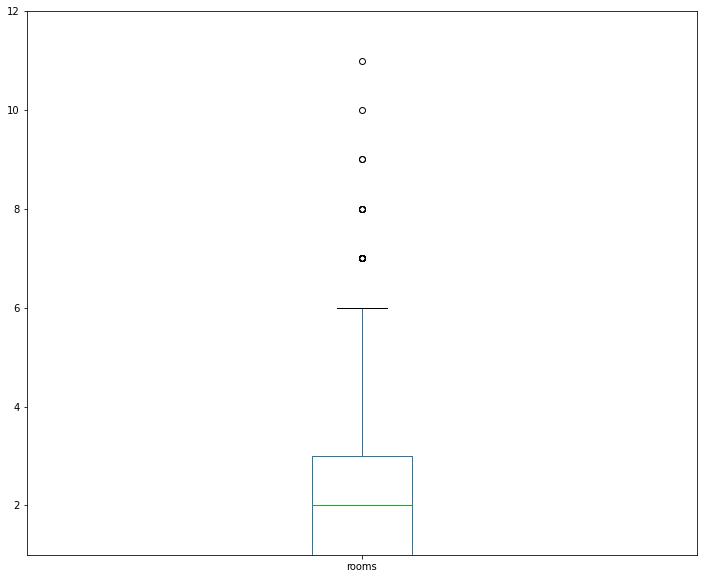

In [64]:
data_1['rooms'].plot(kind='box', figsize=(12, 10))
plt.ylim (1, 12)
plt.show()

In [65]:
q3, q1 = np.percentile (data_1['rooms'], [75 ,25])
iqr = q3 - q1
iqr

2.0

In [66]:
q1 - iqr*1.5

-2.0

Минимум значений находится выше относительно 0 и полученной границы "уса", поэтому минимум ящика с усами будет находиться в точке 0

In [67]:
q3 + iqr*1.5

6.0

Как я писала на предыдущем этапе, данные из этой переменной я оставлю нетронутыми, поскольку это может повлиять на результат проверки гипотез.

##### ceiling_height

In [68]:
data_1['ceiling_height'].describe()

count    22928.000000
mean         2.710452
std          1.000512
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

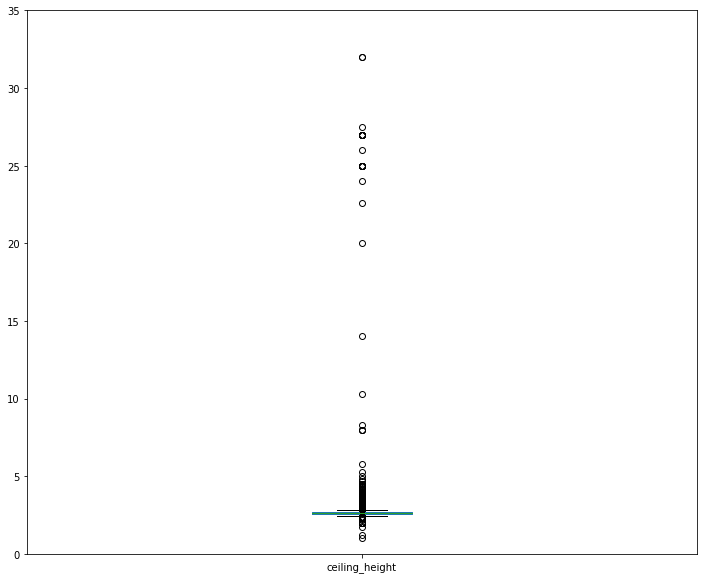

In [69]:
data_1['ceiling_height'].plot(kind='box', figsize=(12, 10))
plt.ylim (0, 35)
plt.show()

Некоторые значения не поддаются критической оценке: потолки в квартирах выше, чем 5 метров похожи на аномальные значения. Однако, квартиры выше 25 метров могут быть ошибкой ввода пользователя и на самом деле эти потолки в 10 раз ниже. Значит, потолки выше 25 метров можно разделить на 10, а те, что выше границы верхнего уса ящика после преобразования данных можно считать выбросами.

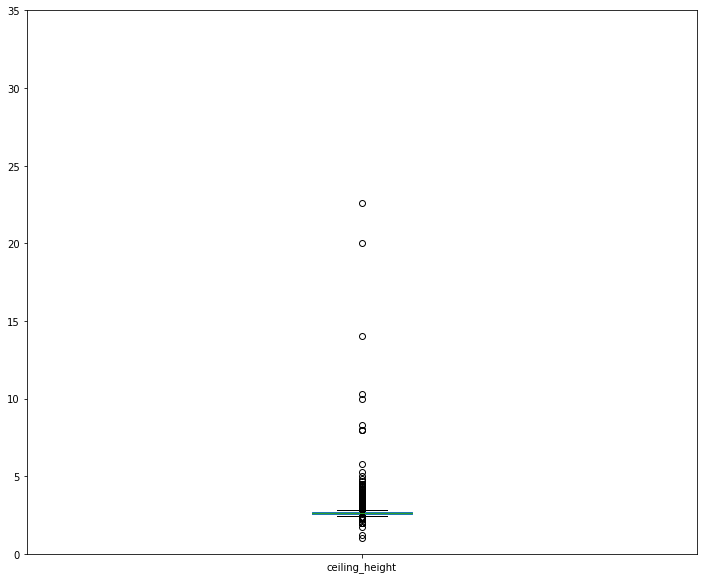

In [70]:
import warnings
warnings.filterwarnings("ignore")

data_1["ceiling_height"] = data_1["ceiling_height"].where(data_1["ceiling_height"]<24, other = data_1["ceiling_height"]/10)

data_1['ceiling_height'].plot(kind='box', figsize=(12, 10))
plt.ylim (0, 35)
plt.show()

Для преобразования были выбраны значения именно после 24, поскольку если преобразовать высоту после 10, то после преобразования таки потолки будут высотой от 1 метра, что не является реалистичным.

In [71]:
q3, q1 = np.percentile (data_1['ceiling_height'], [75 ,25])
iqr = q3 - q1
iqr

0.10000000000000009

In [72]:
q1 - iqr*1.5

2.45

In [73]:
q3 + iqr*1.5

2.8500000000000005

Были получены значения, выше и ниже которых значения можно считать выбросами. Проверим, сколько таких значений.

In [74]:
data_1.loc[(data_1['ceiling_height'] < 2.45)]['ceiling_height'].count()

45

In [75]:
data_1.loc[(data_1['ceiling_height'] > 2.8500000000000005)]['ceiling_height'].count()

2466

Поскольку высота потолка не важна для проверки гипотез, то удалять почти 2 тысячи строк с данными не рационально. Вместо аномальных значений следует поставить пропуски.

In [76]:
warnings.filterwarnings("ignore")
data_1["ceiling_height"] = data_1["ceiling_height"].where(data_1["ceiling_height"]>2.45)

In [77]:
warnings.filterwarnings("ignore")
data_1["ceiling_height"] = data_1["ceiling_height"].where(data_1["ceiling_height"]<2.8500000000000005)

##### floor

In [78]:
data_1['floor'].describe()

count    22928.000000
mean         5.897549
std          4.901384
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

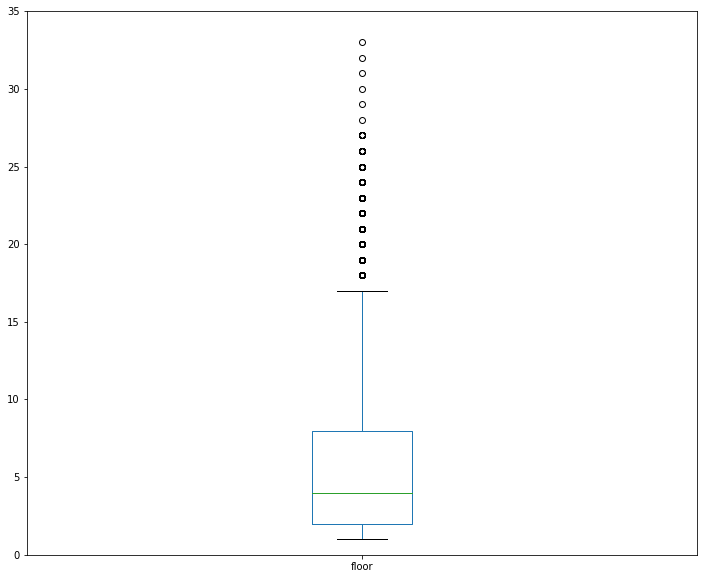

In [79]:
data_1['floor'].plot(kind='box', figsize=(12, 10))
plt.ylim (0, 35)
plt.show()

In [80]:
q3, q1 = np.percentile (data_1['floor'], [75 ,25])
iqr = q3 - q1
iqr

6.0

In [81]:
q1 - 1.5*iqr

-7.0

Минимум значений находится выше относительно 0 и полученной границы "уса", поэтому минимум ящика с усами будет находиться в точке 0

In [82]:
q3 + 1.5*iqr

17.0

Были получены значения, выше которых значения можно считать выбросами. Проверим, сколько таких значений.

In [83]:
data_1.loc[(data_1['floor'] > 17.0)]['floor'].count()

892

Как я решила ранее, данные из этой переменной я оставлю нетронутыми, поскольку это может повлиять на результат проверки гипотез. К тому же, этажи слишком вариативная переменная, не означающая выраженность какого-то признака.

##### living_area & kitchen_area

Следует проверить данные на предмет такой аномалии как "неравенство суммы жилой площади и кухни общей площади"

In [84]:
data_2 = data_1.loc[(data_1['kitchen_area']+data_1['living_area']) > data_1['total_area']]
data_2 = data_2[['kitchen_area', 'living_area', 'total_area']]
data_2

,kitchen_area,living_area,total_area
184,6.20,26.10,30.20
545,5.00,20.00,23.80
551,9.28,30.55,31.59
601,7.00,48.30,53.70
696,23.43,23.43,34.69
...,...,...,...
21824,8.60,38.00,44.00
21868,8.00,30.60,34.30
21915,32.40,62.00,91.40
21956,8.00,44.00,46.00


Эти данные следует удалить, поскольку они не подчиняются законам логики и считаются аномалиями.

In [85]:
data_1 = data_1.loc[(data_1['kitchen_area'] + data_1['living_area']) != data_1['total_area']]
data_1.shape

(22862, 23)

Как я решила ранее, данные из этих переменных я оставлю нетронутыми, поскольку это может повлиять на результат проверки гипотез.

##### days_exposition

In [86]:
data_1['days_exposition'].describe()

count    19894.000000
mean       177.845582
std        216.596338
min          1.000000
25%         44.000000
50%         94.000000
75%        226.750000
max       1580.000000
Name: days_exposition, dtype: float64

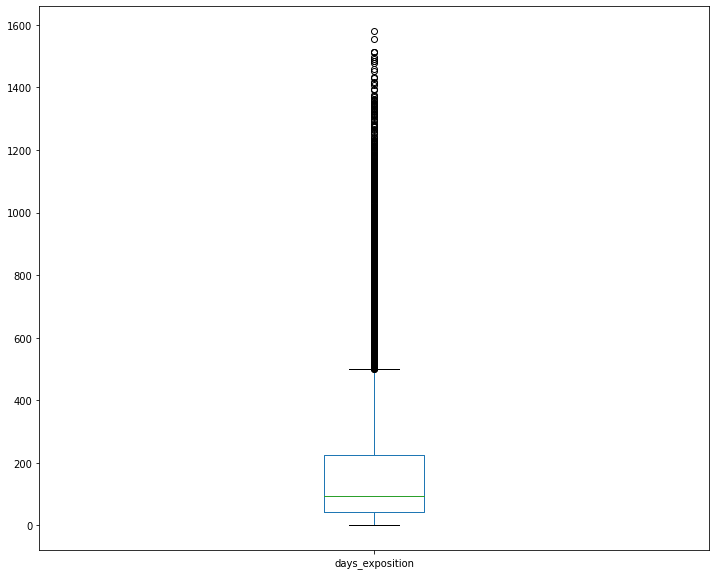

In [87]:
data_1['days_exposition'].plot(kind='box', figsize=(12, 10))
plt.show()

In [88]:
q3, q1 = np.percentile (data_1['days_exposition'], [75 ,25])
iqr = q3 - q1
iqr

nan

Поскольку в данном столбце есть пропущенные значения, то придется вручную считать межквартильный размах.

In [89]:
226 - 44

182

In [90]:
44-1.5*182

-229.0

Минимум значений находится выше относительно 0 и полученной границы "уса", поэтому минимум ящика с усами будет находиться в точке 0

In [91]:
226+1.5*182

499.0

In [92]:
data_1.loc[(data_1['days_exposition'] > 500.0)]['days_exposition'].count()

1639

Такое количество выбросов пригодится для будущей проверки одной из гипотез, поэтому данные рациональнее оставить неизменными.

##### city_centers_nearest

In [93]:
data_1['city_centers_nearest'].describe()

count    17395.000000
mean     14512.430813
std       8576.686945
min        208.000000
25%       9850.000000
50%      13285.000000
75%      16465.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

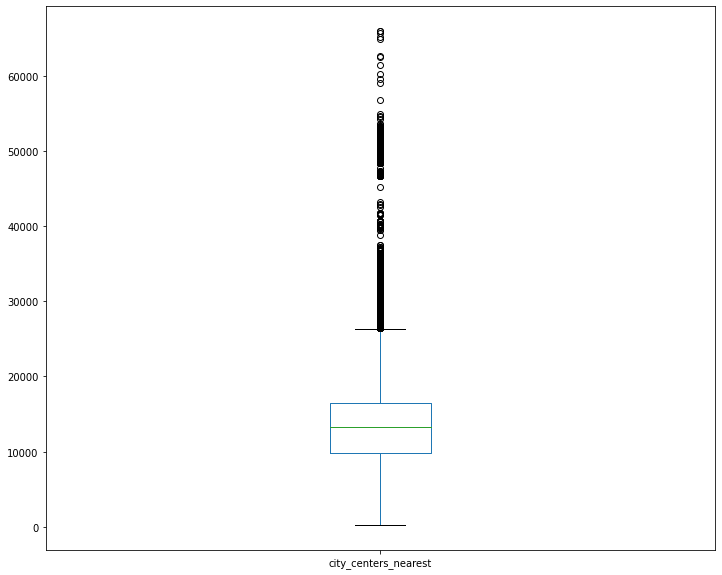

In [94]:
data_1['city_centers_nearest'].plot(kind='box', figsize=(12, 10))
plt.show()

Так как позже булет проводиться детальный анализ по этим данным, то все выбросы можно позже определить в отдельную категорию, которая повлияет на результат.

In [95]:
data_1.shape[0]

22862

In [96]:
data.shape[0]

23650

Таким образом, на этапе предобработки данных было удалено 788 выброса, что входит в допустимый диапазон.

### Посчитайте и добавьте в таблицу новые столбцы

Новые столбцы следует добавить в оба датасета для дальнейшего анализа.

#### цена одного квадратного метра

In [97]:
data['one_metr'] = (data['last_price'] / data['total_area'])
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,town_category,one_metr
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1,482,2,755,NaN,город,120370.370370
1,7,3350000,40.4,2018-12-04,1,2.60,11.0,18.6,1,NaN,...,поселок Шушары,12817.0,18603.0,0,0,0,0,81.0,не город,82920.792079
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1,90,2,574,558.0,город,92785.714286
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2,84,3,234,424.0,город,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2,112,1,48,121.0,город,100000.000000


In [98]:
data_1['one_metr'] = (data_1['last_price'] / data_1['total_area'])

#### день недели публикации

In [99]:
import datetime as dt
data['week_day'] = data['first_day_exposition'].dt.day_of_week
data_1['week_day'] = data_1['first_day_exposition'].dt.day_of_week

#### месяц публикации объявления

In [100]:
data['month'] = data['first_day_exposition'].dt.month_name()
data_1['month'] = data_1['first_day_exposition'].dt.month_name()

#### год публикации объявления

In [101]:
data['year'] = data['first_day_exposition'].dt.year
data_1['year'] = data_1['first_day_exposition'].dt.year

#### тип этажа квартиры

In [102]:
def types_floor(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        return pd.NA

data['type_of_floor'] = data.apply(types_floor, axis=1)
data_1['type_of_floor'] = data_1.apply(types_floor, axis=1)

#### расстояние до центра города в км

In [103]:
data['to_city_center'] = data['city_centers_nearest']/1000
data_1['to_city_center'] = data_1['city_centers_nearest']/1000

Теперь следует убедиться, что все новые данные появились.

In [104]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,town_category,one_metr,week_day,month,year,type_of_floor,to_city_center
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,2,755,NaN,город,120370.370370,3,March,2019,другой,16.028
1,7,3350000,40.4,2018-12-04,1,2.60,11.0,18.6,1,NaN,...,0,0,81.0,не город,82920.792079,1,December,2018,первый,18.603
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,2,574,558.0,город,92785.714286,3,August,2015,другой,13.933
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,3,234,424.0,город,408176.100629,4,July,2015,другой,6.800
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,1,48,121.0,город,100000.000000,1,June,2018,другой,8.098


In [105]:
data_1.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,town_category,one_metr,week_day,month,year,type_of_floor,to_city_center
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,2,755,NaN,город,120370.370370,3,March,2019,другой,16.028
1,7,3350000,40.4,2018-12-04,1,2.60,11.0,18.6,1,NaN,...,0,0,81.0,не город,82920.792079,1,December,2018,первый,18.603
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,2,574,558.0,город,92785.714286,3,August,2015,другой,13.933
4,2,10000000,100.0,2018-06-19,2,NaN,14.0,32.0,13,NaN,...,1,48,121.0,город,100000.000000,1,June,2018,другой,8.098
5,10,2890000,30.4,2018-09-10,1,2.60,12.0,14.4,5,NaN,...,0,0,55.0,не город,95065.789474,0,September,2018,другой,NaN


### Проведите исследовательский анализ данных

Теперь следует рассмотреть данные с помощью визуализации и статистик.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>],
       [<AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>,
        <AxesSubplot:title={'center':'parks_around_3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>],
       [<AxesSubplot:title={'center':'ponds_around_3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_expositio

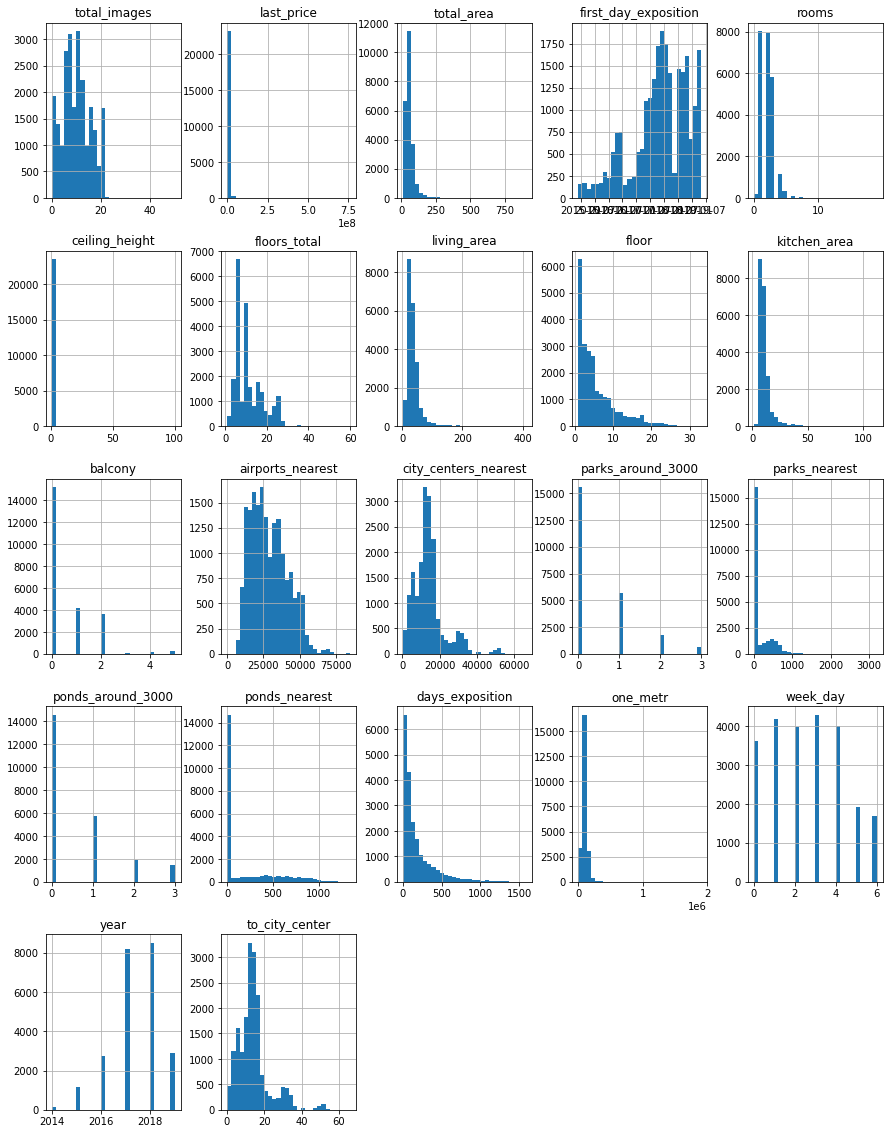

In [106]:
data.hist(bins = 30, figsize=(15, 20))

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>],
       [<AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>,
        <AxesSubplot:title={'center':'parks_around_3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>],
       [<AxesSubplot:title={'center':'ponds_around_3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_expositio

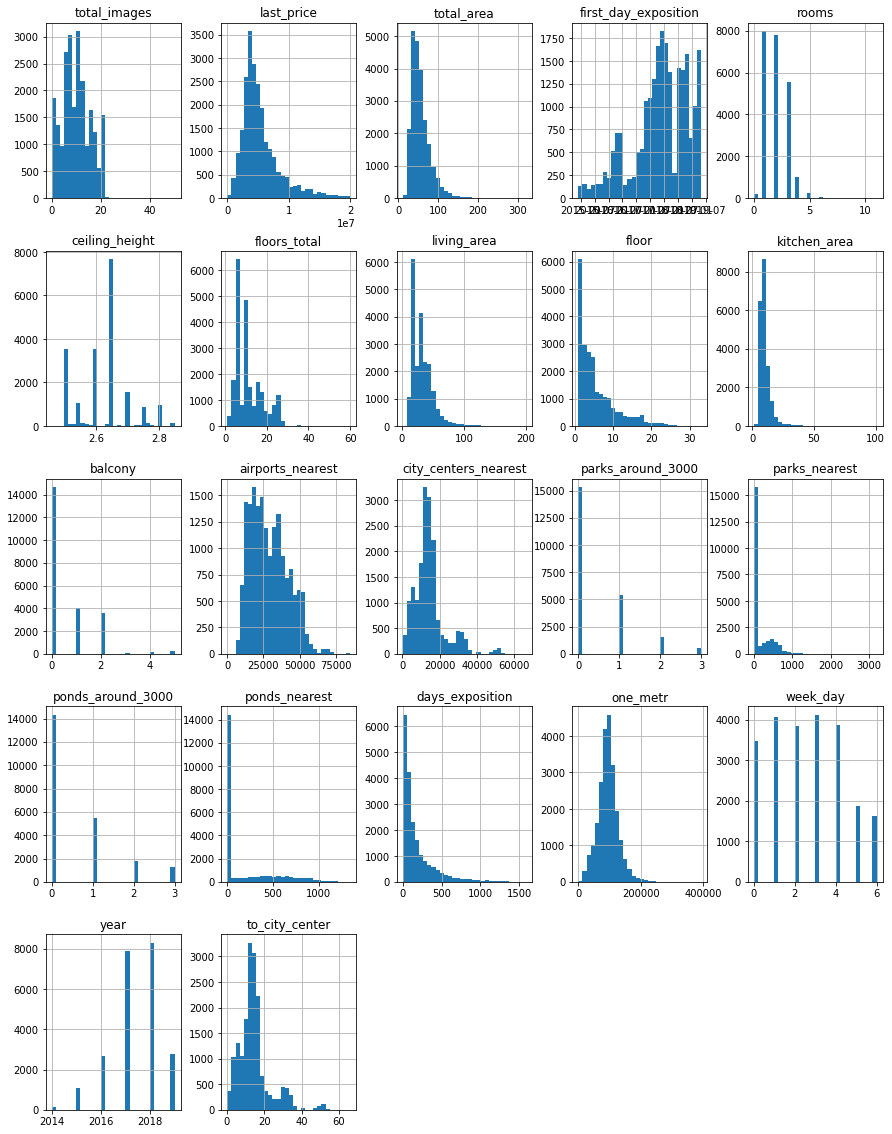

In [107]:
data_1.hist(bins=30, figsize=(15, 20))

In [108]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_metr,week_day,year,to_city_center
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23565.000000,21752.000000,23650.000000,21381.000000,23650.000000,...,18139.000000,23650.000000,23650.000000,23650.000000,23650.000000,20470.000000,2.365000e+04,23650.000000,23650.000000,18139.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.720271,10.675875,34.448356,5.893277,10.566403,0.591712,...,14197.860742,0.469091,167.359789,0.590359,199.009471,180.753200,9.943225e+04,2.568710,2017.370021,14.197861
std,5.682278,1.089640e+07,35.661808,1.078620,0.989652,6.594823,22.037664,4.883317,5.901753,0.959662,...,8606.830295,0.748458,306.832134,0.883539,305.203376,219.777916,5.033794e+04,1.788808,1.037806,8.606830
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,181.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.118349e+02,0.000000,2014.000000,0.181000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,...,9241.000000,0.000000,0.000000,0.000000,0.000000,45.000000,7.661497e+04,1.000000,2017.000000,9.241000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,13105.000000,0.000000,0.000000,0.000000,0.000000,95.000000,9.500000e+04,3.000000,2017.000000,13.105000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,...,16293.000000,1.000000,301.000000,1.000000,389.000000,231.000000,1.142742e+05,4.000000,2018.000000,16.293000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,2019.000000,65.968000


In [109]:
data_1.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_metr,week_day,year,to_city_center
count,22862.000000,2.286200e+04,22862.000000,22862.000000,20343.000000,22779.000000,21059.000000,22862.000000,20675.000000,22862.000000,...,17395.000000,22862.000000,22862.000000,22862.000000,22862.000000,19894.000000,22862.000000,22862.000000,22862.000000,17395.000000
mean,9.780772,5.412215e+06,56.660971,2.009098,2.625949,10.743053,32.494871,5.900009,10.101621,0.592993,...,14512.430813,0.445018,162.668008,0.564255,196.111451,177.845582,94800.449847,2.568498,2017.378182,14.512431
std,5.623191,3.195132e+06,24.586737,0.985173,0.081664,6.627883,16.648737,4.901575,4.703551,0.954633,...,8576.686945,0.725183,304.173108,0.860537,305.289638,216.596338,32519.193201,1.788622,1.029766,8.576687
min,0.000000,1.219000e+04,12.000000,0.000000,2.460000,1.000000,2.000000,1.000000,1.300000,0.000000,...,208.000000,0.000000,0.000000,0.000000,0.000000,1.000000,111.834862,0.000000,2014.000000,0.208000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.485000,2.000000,7.000000,0.000000,...,9850.000000,0.000000,0.000000,0.000000,0.000000,44.000000,75812.449247,1.000000,2017.000000,9.850000
50%,9.000000,4.550000e+06,51.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,13285.000000,0.000000,0.000000,0.000000,0.000000,94.000000,94059.696089,3.000000,2017.000000,13.285000
75%,14.000000,6.500000e+06,67.000000,3.000000,2.650000,16.000000,41.300000,8.000000,11.500000,1.000000,...,16465.000000,1.000000,284.000000,1.000000,379.000000,226.750000,112107.623318,4.000000,2018.000000,16.465000
max,50.000000,1.999900e+07,320.000000,11.000000,2.850000,60.000000,199.000000,33.000000,100.700000,5.000000,...,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,392354.124748,6.000000,2019.000000,65.968000


Следует отдельно рассчитать все медианы для дальнейшего анализа и заключения вывода.

#### общая площадь

In [110]:
data['total_area'].median()

52.0

In [111]:
data_1['total_area'].median()

51.0

#### жилая площадь

In [112]:
data['living_area'].median()

30.0

In [113]:
data_1['living_area'].median()

30.0

#### площадь кухни

In [114]:
data['kitchen_area'].median()

9.1

In [115]:
data_1['kitchen_area'].median()

9.0

#### цена объекта

In [116]:
data['last_price'].median()

4650000.0

In [117]:
data_1['last_price'].median()

4550000.0

#### количество комнат

In [118]:
data['rooms'].median()

2.0

In [119]:
data_1['rooms'].median()

2.0

#### высота потолков

In [120]:
data['ceiling_height'].median()

2.65

In [121]:
data_1['ceiling_height'].median()

2.65

#### этаж квартиры

In [122]:
data['floor'].median()

4.0

In [123]:
data_1['floor'].median()

4.0

#### общее количество этажей в доме

In [124]:
data['floors_total'].median()

9.0

In [125]:
data_1['floor'].median()

4.0

#### расстояние до центра города в метрах

In [126]:
data['city_centers_nearest'].median()

13105.0

In [127]:
data_1['city_centers_nearest'].median()

13285.0

#### расстояние до ближайшего аэропорта

In [128]:
data['airports_nearest'].median()

26756.5

In [129]:
data_1['airports_nearest'].median()

26880.0

#### расстояние до ближайшего парка

In [130]:
data['parks_nearest'].median()

0.0

In [131]:
data_1['parks_nearest'].median()

0.0

#### день публикации объявления

In [132]:
data['first_day_exposition'].dt.day.median()

15.0

In [133]:
data_1['first_day_exposition'].dt.day.median()

15.0

#### месяц публикации объявления

In [134]:
data['first_day_exposition'].dt.month.median()

6.0

In [135]:
data_1['first_day_exposition'].dt.month.median()

6.0

**По данным гистограммам:**  
можно установить портрет самых популярных предложений о продаже объектов недвижимости. Самыми рапространенными параметрами являются:  
- общая площадь квартиры около 51 квадратный метр (до удаления выбросов было 52, после удаления распределение сместилось более влево, поскольку средний показатель изменился с 60 на 57).  
- жилая площадь квартиры около 30 квадратных метров (присутствует резкое снижение встречаемости квартир с жилплощадью менее 10 метров, медианы одинаковы до и после удаления,  после удаления распределение сместилось более влево, поскольку средний показатель изменился с 34 на 32).  
- площадь кухонь в 9 квадратных метров (медианы почти одинаковы до и после удаления,  после удаления распределение сместилось более влево, поскольку средний показатель изменился с 11 на 10).  
- двухкомнатные квартиры (можно отдельно отметить, что чем больше количество комнат, тем реже такие квартиры встречаются).  
- высота потолков 2,65 метров (медианы одинаковы до и после удаления выбросов, а распределение сместилось немного влево, поскольку средний показатель изменился с 2,7 на 2,65).  
- этаж проживания 4 (медианы и средние одинаковы до и после удаления выбросов).    
- общее кол-во этажей изменился после выбросов с 9 до 4 (средние равны 11 и одинаоквы до и псоле удаления выбросов).  
- расстояние до 20 км от центра города. 
- расстояние около 13 км от ближайшего аэропорта.  
- расстояние до 300 метров до ближайшего парка.  
- середина месяца(до и после 15го числа до и после удаления выбросов).  
- середина года (до и после удаления 6 месяц).  

Если проанализировать визуализацию до удаления выбросов и после, то данные не критично различаются, однако некоторые распределения стали приближенны к нормальному (например, цена за объект недвижимости.)

**Изучение времени продаж**

<AxesSubplot:>

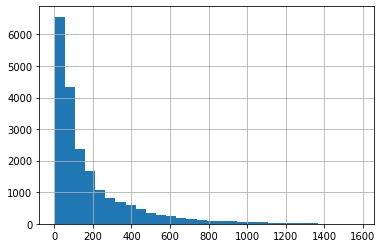

In [136]:
data['days_exposition'].hist(bins=30)

<AxesSubplot:>

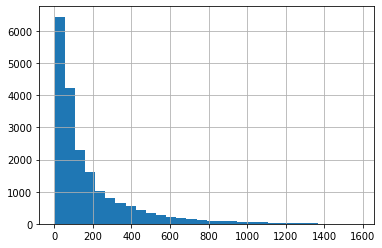

In [137]:
data_1['days_exposition'].hist(bins=30)

In [138]:
data['days_exposition'].mean()

180.7531998045921

In [139]:
data_1['days_exposition'].mean()

177.84558158238664

In [140]:
data['days_exposition'].median()

95.0

In [141]:
data_1['days_exposition'].median()

94.0

In [142]:
data['days_exposition'].max()

1580.0

In [143]:
data_1['days_exposition'].max()

1580.0

In [144]:
data['days_exposition'].min()

1.0

In [145]:
data_1['days_exposition'].min()

1.0

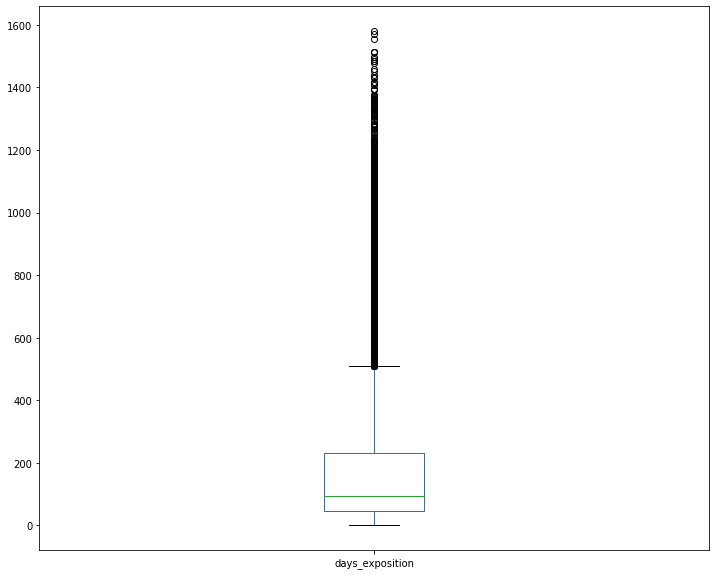

In [146]:
data['days_exposition'].plot(kind='box', figsize=(12, 10))
plt.show()

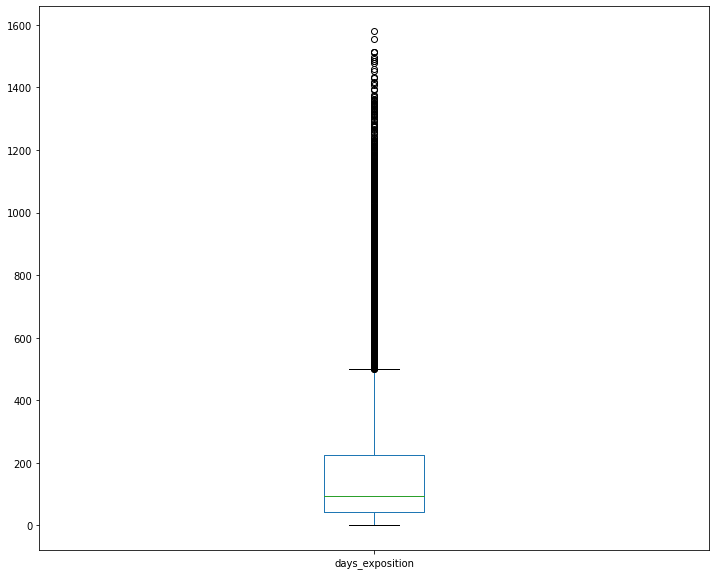

In [147]:
data_1['days_exposition'].plot(kind='box', figsize=(12, 10))
plt.show()

In [148]:
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [149]:
data_1['days_exposition'].describe()

count    19894.000000
mean       177.845582
std        216.596338
min          1.000000
25%         44.000000
50%         94.000000
75%        226.750000
max       1580.000000
Name: days_exposition, dtype: float64

В целом, данные по переменной не очень отличаются друг от друга (удаление выбросов не исказило данные).  
Как можно заметить по визуализации времени продаж нелвижимости, есть линейная зависимость между частотой быстрых прожад и долгих (быстрых больше, чем долгих). После корректировки данных (удаления выбросов), среднее арифметическое значение и медиана показателей двух выборок отличаются в два раза. Следовательно, продажа обычно занимает около 94-95 дней.  
После удаления выбросов самой долгой продажей в обоих выборках стала продажа, длящаяся пости 4 года, а самыми короткими продажами являются те, что совершены через день. В целом можно установить, что больше продаж совершено до 200 дней.  
**Быстрыми продажами можно считать те, что совершаются до 44-45 дней.**

**Факторы, влияющие на формирование цены за объект недвижимости.**

Чтобы проверить, какие именно факторы влияют на формирование цены - построим сводные таблицы и графики корреляции.

**Общая площадь**

<AxesSubplot:title={'center':'Зависимость цены от общей площади'}, xlabel='total_area', ylabel='last_price'>

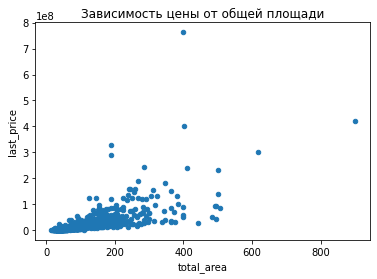

In [150]:
price_total_area = data.pivot_table(index = "last_price", values = "total_area").sort_values("total_area")
price_total_area.reset_index(inplace= True)
price_total_area.plot(x='total_area', y='last_price', kind='scatter', title = "Зависимость цены от общей площади")

In [151]:
price_total_area['last_price'].corr(price_total_area['total_area'])

0.6894327969091839

<AxesSubplot:title={'center':'Зависимость цены от общей площади'}, xlabel='total_area', ylabel='last_price'>

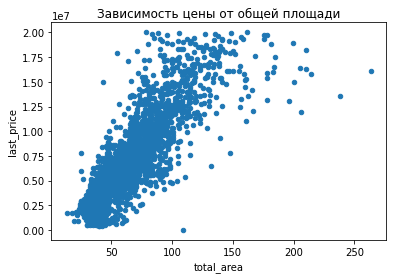

In [152]:
price_total_area_1 = data_1.pivot_table(index = "last_price", values = "total_area").sort_values("total_area")
price_total_area_1.reset_index(inplace= True)
price_total_area_1.plot(x='total_area', y='last_price', kind='scatter', title = "Зависимость цены от общей площади")

In [153]:
price_total_area_1['last_price'].corr(price_total_area_1['total_area'])

0.8345189046604475

**Вывод:**  
Проанализировав коэффициент корреляции Пирсона можно сказать, что размер общей площади влияет на формирование цены за объект недвижимости (коэффциент положителен и близок к 1, что означает значительное влияние) в обоих выборках.

**Жилая площадь**

<AxesSubplot:title={'center':'Зависимость цены от жилой площади'}, xlabel='living_area', ylabel='last_price'>

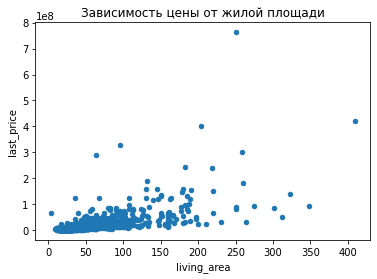

In [154]:
price_living_area = data.pivot_table(index = "last_price", values = "living_area").sort_values("living_area")
price_living_area.reset_index(inplace= True)
price_living_area.plot(x='living_area', y='last_price', kind='scatter', title = "Зависимость цены от жилой площади")

In [155]:
price_living_area['last_price'].corr(price_living_area['living_area'])

0.6372507926440156

<AxesSubplot:title={'center':'Зависимость цены от жилой площади'}, xlabel='living_area', ylabel='last_price'>

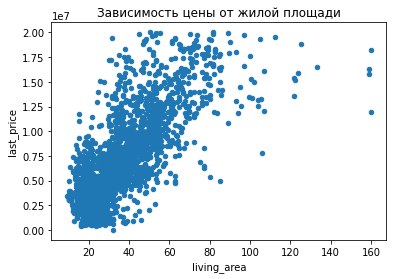

In [156]:
price_living_area_1 = data_1.pivot_table(index = "last_price", values = "living_area").sort_values("living_area")
price_living_area_1.reset_index(inplace= True)
price_living_area_1.plot(x='living_area', y='last_price', kind='scatter', title = "Зависимость цены от жилой площади")

In [157]:
price_living_area_1['last_price'].corr(price_living_area_1['living_area'])

0.7428600731000472

**Вывод:**  
Проанализировав коэффициент корреляции Пирсона можно сказать, что размер жилой площади влияет на формирование цены за объект недвижимости (коэффциент положителен и в достаточной степени близок к 1, что означает влияние) в обоих выборках.

**Площадь кухни**

<AxesSubplot:title={'center':'Зависимость цены от площади кухни'}, xlabel='kitchen_area', ylabel='last_price'>

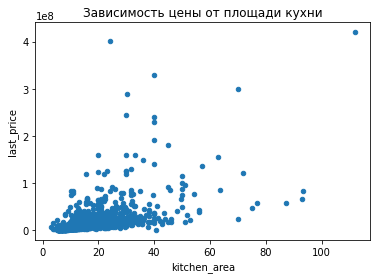

In [158]:
price_kitchen_area = data.pivot_table(index = "last_price", values = "kitchen_area").sort_values("kitchen_area")
price_kitchen_area.reset_index(inplace= True)
price_kitchen_area.plot(x='kitchen_area', y='last_price', kind='scatter', title = "Зависимость цены от площади кухни")

In [159]:
price_kitchen_area['last_price'].corr(price_kitchen_area['kitchen_area'])

0.5859383340108659

<AxesSubplot:title={'center':'Зависимость цены от площади кухни'}, xlabel='kitchen_area', ylabel='last_price'>

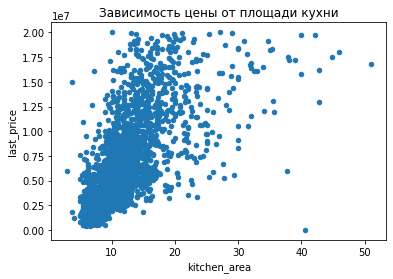

In [160]:
price_kitchen_area_1 = data_1.pivot_table(index = "last_price", values = "kitchen_area").sort_values("kitchen_area")
price_kitchen_area_1.reset_index(inplace= True)
price_kitchen_area_1.plot(x='kitchen_area', y='last_price', kind='scatter', title = "Зависимость цены от площади кухни")

In [161]:
price_kitchen_area_1['last_price'].corr(price_kitchen_area_1['kitchen_area'])

0.6415465550556673

**Вывод:**  
Проанализировав коэффициент корреляции Пирсона можно сказать, что размер площади кухни влияет на формирование цены за объект недвижимости (коэффциент положителен и в достаточной степени близок к 1, что означает влияние) в обоих выборках.

**Количество комнат**

<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='rooms', ylabel='last_price'>

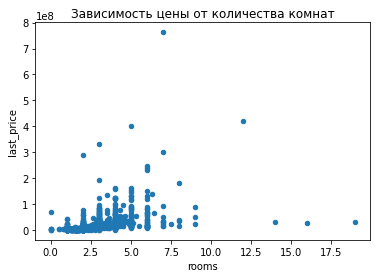

In [162]:
price_rooms = data.pivot_table(index = "last_price", values = "rooms").sort_values("rooms")
price_rooms.reset_index(inplace= True)
price_rooms.plot(x='rooms', y='last_price', kind='scatter', title = "Зависимость цены от количества комнат")

In [163]:
price_rooms['last_price'].corr(price_rooms['rooms'])

0.44477620769089943

<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, xlabel='rooms', ylabel='last_price'>

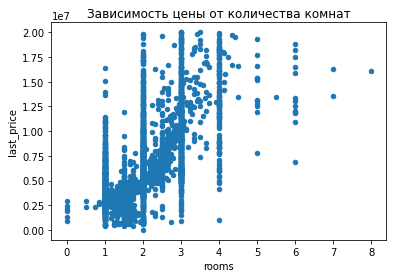

In [164]:
price_rooms_1 = data_1.pivot_table(index = "last_price", values = "rooms").sort_values("rooms")
price_rooms_1.reset_index(inplace= True)
price_rooms_1.plot(x='rooms', y='last_price', kind='scatter', title = "Зависимость цены от количества комнат")

In [165]:
price_rooms_1['last_price'].corr(price_rooms_1['rooms'])

0.648306499812369

**Вывод**:
Проанализировав коэффициент корреляции Пирсона можно сказать, что количество комнат влияет на формирование цены за объект недвижимости (коэффциент положителен в обоих выборках, но в необработанной коэффециент ниже, чем в обработанной).

**Этаж, на котором расположена квартира**

In [166]:
price_type_of_floor = data.pivot_table(index = "type_of_floor", values = "last_price", aggfunc = 'median')
price_type_of_floor.reset_index(inplace= True)
price_type_of_floor

,type_of_floor,last_price
0,другой,4850000
1,первый,3900000
2,последний,4300000


Text(0, 0.5, 'цена')

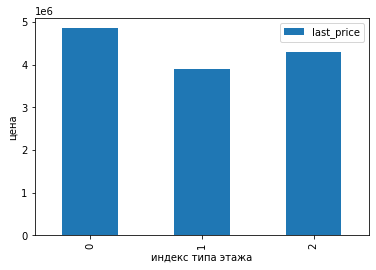

In [167]:
price_type_of_floor.plot.bar()
plt.xlabel("индекс типа этажа")
plt.ylabel("цена")

In [168]:
price_type_of_floor_1 = data_1.pivot_table(index = "type_of_floor", values = "last_price", aggfunc = 'median')
price_type_of_floor_1.reset_index(inplace= True)
price_type_of_floor_1

,type_of_floor,last_price
0,другой,4750000
1,первый,3899000
2,последний,4200000


Text(0, 0.5, 'цена')

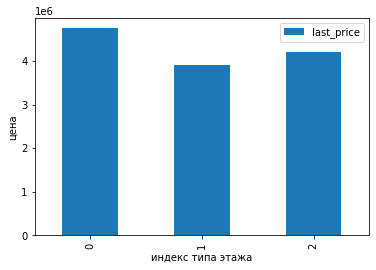

In [169]:
price_type_of_floor_1.plot.bar()
plt.xlabel("индекс типа этажа")
plt.ylabel("цена")

**Вывод**:
Проанализировав распределение данных по средней цене за объект недвижимости в 2х выборках, в зависимости от типа расположения этажа можно сказать, что тип этажа влияет на формирование цены за объект недвижимости - первый и последний этажи стоят меньше, чем другие. Однако о характере влияния данного фактора сказать сложно из-за категориальности переменных.

**День недели размещения**

In [170]:
price_week_day = data.pivot_table(index = "week_day", values = "last_price", aggfunc = 'median')
price_week_day.reset_index(inplace= True)
price_week_day

,week_day,last_price
0,0,4650000
1,1,4720000
2,2,4700000
3,3,4650000
4,4,4577500
5,5,4575000
6,6,4550000


Text(0, 0.5, 'цена')

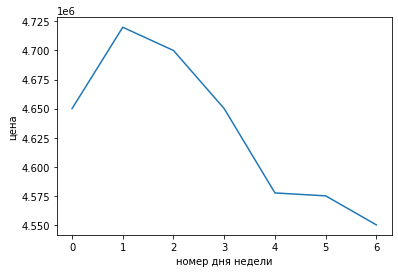

In [171]:
price_week_day['last_price'].plot()
plt.xlabel("номер дня недели")
plt.ylabel("цена")

In [172]:
price_week_day_1 = data_1.pivot_table(index = "week_day", values = "last_price", aggfunc = 'median')
price_week_day_1.reset_index(inplace= True)
price_week_day_1

,week_day,last_price
0,0,4550000
1,1,4650000
2,2,4600000
3,3,4550000
4,4,4500000
5,5,4500000
6,6,4500000


Text(0, 0.5, 'цена')

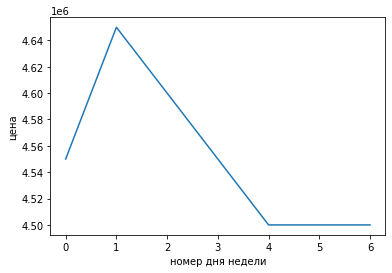

In [173]:
price_week_day_1['last_price'].plot()
plt.xlabel("номер дня недели")
plt.ylabel("цена")

**Вывод**:
Проанализировав распределение данных по средней цене за объект недвижимости в зависимости от дня недели публикации в 2х выборках, можно сказать, что день недели размещения влияет на формирование цены за объект недвижимости - на вторник приходится пиковый взлет цены, после чего она снижается, и днем с самой низкой ценой считается воскресенье в первой выборке и пятница, суббота и воскресенье во второй выборке. Однако о характере влияния данного фактора сказать сложно из-за категориальности переменных. Однако, характер снижения цены у двух выборок разный - в необработанной он более плавный.

**Месяц размещения**

In [174]:
price_month = data.pivot_table(index = "month", values = "last_price", aggfunc = 'median').sort_values(by = 'last_price')
price_month.reset_index(inplace= True)
price_month

,month,last_price
0,June,4400000
1,May,4500000
2,October,4560000
3,August,4570000
4,January,4600000
5,February,4650000
6,July,4650000
7,March,4650000
8,December,4695000
9,November,4700000


Text(0, 0.5, 'цена')

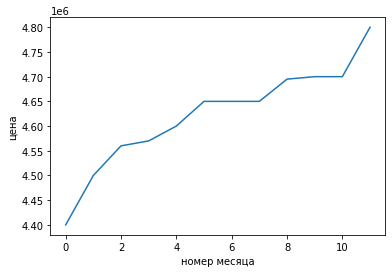

In [175]:
price_month['last_price'].plot()
plt.xlabel("номер месяца")
plt.ylabel("цена")

In [176]:
price_month_1 = data_1.pivot_table(index = "month", values = "last_price", aggfunc = 'median').sort_values(by = 'last_price')
price_month_1.reset_index(inplace= True)
price_month_1

,month,last_price
0,June,4300000
1,August,4500000
2,January,4500000
3,May,4500000
4,October,4500000
5,July,4550000
6,March,4581000
7,February,4590000
8,December,4600000
9,November,4600000


Text(0, 0.5, 'цена')

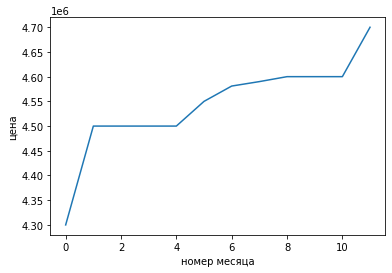

In [177]:
price_month_1['last_price'].plot()
plt.xlabel("номер месяца")
plt.ylabel("цена")

**Вывод**:
Проанализировав распределение данных по средней цене за объект недвижимости в зависимости от месяца публикации в 2х выборках, можно сказать, что месяц размещения влияет на формирование цены за объект недвижимости - в обоих выборках цена повышается в течении всего года, а затем резко снижается в начале следующего. Характер повышнеия цены у двух выборок разный - у первой более постепенное, а у второй наблюдается своеобразное плато в течении 4х месяцев. Однако о характере влияния данного фактора сказать сложно из-за категориальности переменных.

**Год размещения**

In [178]:
price_year = data.pivot_table(index = "year", values = "last_price", aggfunc = 'median').sort_values(by = 'year')
price_year.reset_index(inplace= True)
price_year

,year,last_price
0,2014,7640000
1,2015,5350000
2,2016,4550000
3,2017,4500000
4,2018,4550000
5,2019,5050000


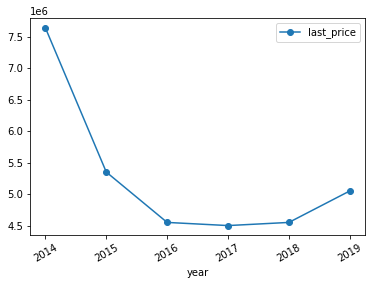

In [179]:
price_year.plot(x='year', y='last_price', rot=30, style = '-o')
plt.show()

In [180]:
price_year_1 = data_1.pivot_table(index = "year", values = "last_price", aggfunc = 'median').sort_values(by = 'year')
price_year_1.reset_index(inplace= True)
price_year_1

,year,last_price
0,2014,6390000
1,2015,5100000
2,2016,4450000
3,2017,4400000
4,2018,4500000
5,2019,4990000


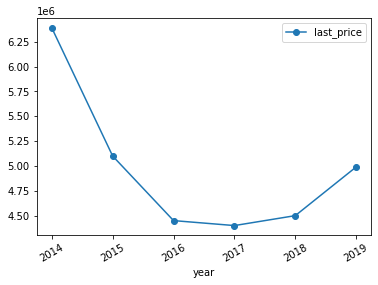

In [181]:
price_year_1.plot(x='year', y='last_price', rot=30, style = '-o')
plt.show()

**Вывод**:
Проанализировав распределение данных по средней цене за объект недвижимости в зависимости от года публикации в 2х выборках, можно сказать, что год размещения влияет на формирование цены за объект недвижимости - после 2017 года цены на недвижимость начали подниматься в обоих выборках. Однако о характере влияния данного фактора сказть сложно из-за категориальности переменных.

**Распределение стоимости квадратного метра в разных населенных пунтках**

In [182]:
ten = data['locality_name'].value_counts(ascending = False)
top_ten =  ten.head(10).index.to_list()
top_ten

['Санкт-Петербург',
 'поселок Мурино',
 'деревня Кудрово',
 'поселок Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'поселок Парголово',
 'Гатчина',
 'Выборг']

In [183]:
filtred_local_name = data[data['locality_name'].isin(top_ten)]

top_ten_city_price= filtred_local_name.pivot_table(index = 'locality_name', values = 'one_metr')
top_ten_city_price.sort_values(by = 'one_metr')

,one_metr
locality_name,
Выборг,58141.909153
Всеволожск,68654.473986
Гатчина,68746.146763
Колпино,75424.579098
поселок Шушары,78677.364217
поселок Мурино,85681.762601
поселок Парголово,90175.913458
деревня Кудрово,95324.930544
Пушкин,103125.819291


In [184]:
ten_1 = data_1['locality_name'].value_counts(ascending = False)
top_ten_1 =  ten_1.head(10).index.to_list()
top_ten_1

['Санкт-Петербург',
 'поселок Мурино',
 'деревня Кудрово',
 'поселок Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'поселок Парголово',
 'Гатчина',
 'Выборг']

In [185]:
filtred_local_name_1 = data_1[data_1['locality_name'].isin(top_ten_1)]

top_ten_city_price_1 = filtred_local_name_1.pivot_table(index = 'locality_name', values = 'one_metr')
top_ten_city_price_1.sort_values(by = 'one_metr')

,one_metr
locality_name,
Выборг,58290.543109
Всеволожск,67214.656127
Гатчина,68746.146763
Колпино,75333.295801
поселок Шушары,78677.364217
поселок Мурино,85603.908530
поселок Парголово,90175.913458
деревня Кудрово,95246.565725
Пушкин,101840.799638


**Вывод:**  
Таким образом, были определены города, в которых больше всего объявлений о продажи недвижимости. Было изучено 2 выборки, в которых совпал список городов, с наибольшим количеством объявлений. По результатаам анализа, в обоих выборках самый дорогой квадратный метр находится в Санкт-Петербурге, однако в необработанной выборке он стоит 114849.008794, а в обработанной от выбросов 108567.751438. По результатаам анализа, в обоих выборках самый дешевый квадратный метр находится в Выборге, однако в необработанной выборке он стоит 58141.909153, а в обработанной от выбросов 58290.543109. Эти различия можно считать несущественными.

**Влияние расстояния от центра Санкт-Петербурга на формирование цены за квадратный метр**

In [186]:
data_spb = data[data['locality_name'] == 'Санкт-Петербург']
price_center = data_spb.pivot_table(index = "to_city_center", values = "one_metr").sort_values(by = 'to_city_center')
price_center.reset_index(inplace= True)
price_center['to_city_center'] = round(price_center['to_city_center'])
price_center = price_center.pivot_table(index = "to_city_center", values = "one_metr")
price_center.reset_index(inplace= True)
price_center['to_city_center'] = price_center['to_city_center'].astype('int')
price_center

,to_city_center,one_metr
0,0,173737.118795
1,1,181820.463785
2,2,149324.246817
3,3,119947.443900
4,4,130414.683814
5,5,129202.546003
6,6,141292.101156
7,7,142297.230044
8,8,119545.886176
9,9,111193.311318


Text(0, 0.5, 'цена квадратного метра')

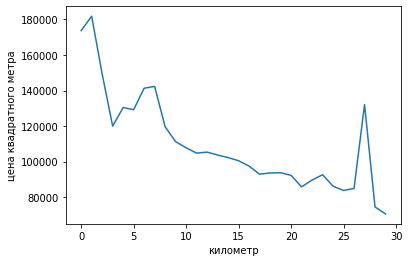

In [187]:
price_center['one_metr'].plot(x = 'to_city_center')
plt.xlabel("километр")
plt.ylabel("цена квадратного метра")

In [188]:
data_spb_1 = data_1[data_1['locality_name'] == 'Санкт-Петербург']
price_center_1 = data_spb_1.pivot_table(index = "to_city_center", values = "one_metr").sort_values(by = 'to_city_center')
price_center_1.reset_index(inplace= True)
price_center_1['to_city_center'] = round(price_center_1['to_city_center'])
price_center_1 = price_center_1.pivot_table(index = "to_city_center", values = "one_metr")
price_center_1.reset_index(inplace= True)
price_center_1['to_city_center'] = price_center_1['to_city_center'].astype('int')
price_center_1

,to_city_center,one_metr
0,0,120191.985702
1,1,129093.102750
2,2,120171.580167
3,3,112757.916897
4,4,117676.738100
5,5,119774.406720
6,6,119605.732170
7,7,120036.826319
8,8,114440.082833
9,9,108128.024475


Text(0, 0.5, 'цена квадратного метра')

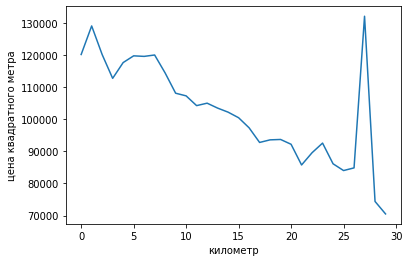

In [189]:
price_center_1['one_metr'].plot(x = 'to_city_center')
plt.xlabel("километр")
plt.ylabel("цена квадратного метра")

**Вывод:**  
Таким образом, можно сделать вывод о том, что цена за 1 квадратный метр объекта недвижимости  в зависимости от расстояния от центра города снижается (не линейно, но снижается) в обоих выборках. Однако, на 27 километре цена резко возрастает, что может быть связано с историко-географическими особенностями Санкт-Петербурга (например, дорогой район или достопримечательность рядом).

### Общий вывод

В ходе исследования, направленного на выявление факторов, вляющих на формирование рыночной стоимости объекта недвижимости были поставлены гипотезы:  
- о влиянии общей площади объекта, жилой площади, площади кухни, количества комнат, типы этажа и даты размещения на формирование цены объекта.  
- самый дорогой квардатный метр находится в Санкт-Петербурге, а самый дешевый - не в городе.  
- расстояние от центра Санкт-Петербурга обратнопропорционально измнению стоимости объекта недвижимости (чем дальше от центра - тем дешевле).

Для того, чтобы изучить, как влияют выбросы ценовых значений на ценообразование объекта недвижимости, была добавлена ещё одна выборка - с удаленными выбросами по данной переменной. 

В результатае анализа существенных различий в результатах по 2 выборкам не было обнаружено. Это означает, что выбросы были качетсвенно обработаны. Далее результаты будут рассматриваться с позиции результатов обработанной от выбросов выборки.

В связи с этим были получены следующие результаты:

- на формирование рыночной стоимости значительно положительно повлияли общая площадь и жилищная площадь (коэффециенты корреляции Пирсона: 0.8345189046604475 и 0.7428600731000472, соответственно)

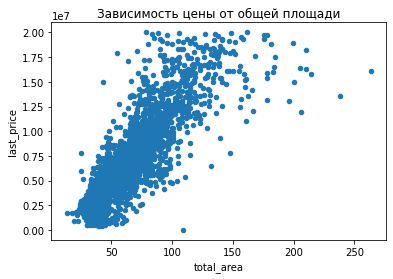

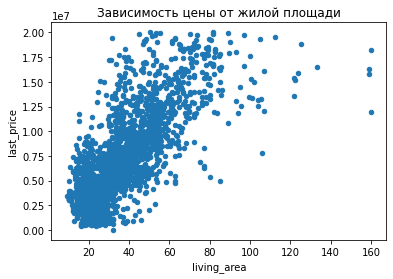

- на формирование рыночной стоимости положительно повлияли площадь кухни и количество комнат (коэффециенты корреляции Пирсона: 0.6415465550556673 и 0.648306499812369, соответственно)

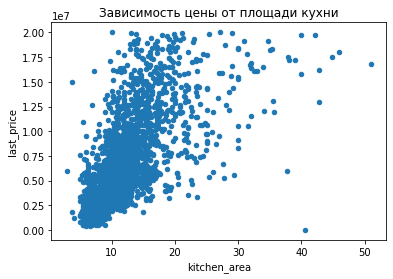

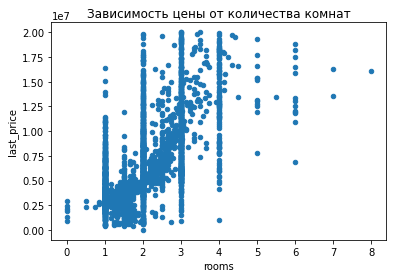

- на формирование рыночной стоимости повлиял тип этажа (первый и последний дешевле, чем другие этажи)

In [190]:
price_type_of_floor_1

,type_of_floor,last_price
0,другой,4750000
1,первый,3899000
2,последний,4200000


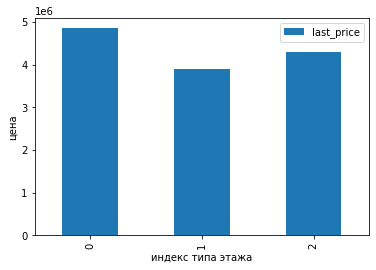

- на формирование рыночной стоимости повлияла дата размещения (есть опрееделенные дни недели и месяцы, когда квартиры стят дороже). Следует отдельно отметить повышение стоимости объектов недвижимости после 2017 года.

In [191]:
price_week_day_1

,week_day,last_price
0,0,4550000
1,1,4650000
2,2,4600000
3,3,4550000
4,4,4500000
5,5,4500000
6,6,4500000


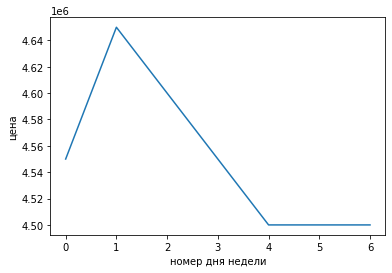

In [192]:
price_month_1

,month,last_price
0,June,4300000
1,August,4500000
2,January,4500000
3,May,4500000
4,October,4500000
5,July,4550000
6,March,4581000
7,February,4590000
8,December,4600000
9,November,4600000


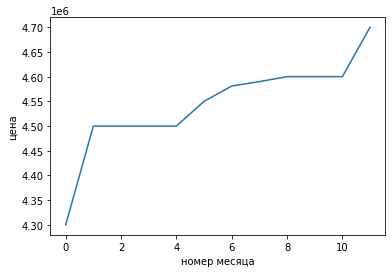

In [193]:
price_year_1

,year,last_price
0,2014,6390000
1,2015,5100000
2,2016,4450000
3,2017,4400000
4,2018,4500000
5,2019,4990000


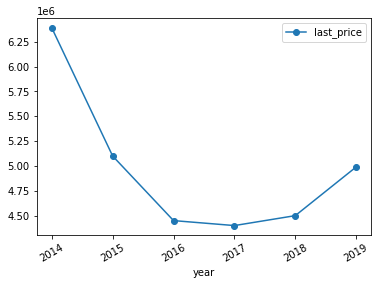

Т.е гипотезы о влиянии данных факторов подтвердились.

- самый дорогой квадратный метр объекта недвижимости действительно оказался в Санкт-Петербурге, однако самый дешевый оказался в городе Выборг (гипотеза подтверждена частично).

In [194]:
top_ten_city_price_1

,one_metr
locality_name,
Всеволожск,67214.656127
Выборг,58290.543109
Гатчина,68746.146763
Колпино,75333.295801
Пушкин,101840.799638
Санкт-Петербург,108567.751438
деревня Кудрово,95246.565725
поселок Мурино,85603.908530
поселок Парголово,90175.913458


- в зависимости от удаления от центра Сакт-Петербурга стоимость квадратного метра недвижимости снижается (гипотеза подтверждена).

In [195]:
price_center_1

,to_city_center,one_metr
0,0,120191.985702
1,1,129093.102750
2,2,120171.580167
3,3,112757.916897
4,4,117676.738100
5,5,119774.406720
6,6,119605.732170
7,7,120036.826319
8,8,114440.082833
9,9,108128.024475


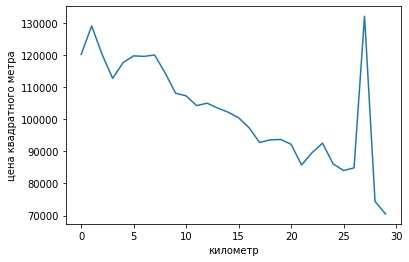